In [14]:
from skimage import io
import matplotlib.pyplot as plt

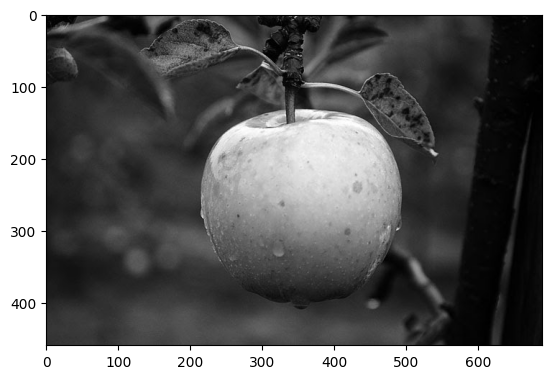

In [15]:
# load in the image
image = io.imread('apple gray.jpeg')
plt.imshow(image)
plt.show()

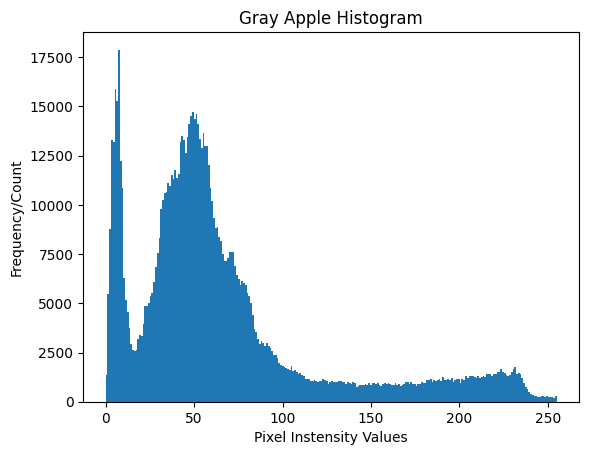

In [16]:
# generate the images histogram

ax = plt.hist(image.ravel(), bins=256)
plt.title('Gray Apple Histogram')
plt.xlabel('Pixel Instensity Values')
plt.ylabel('Frequency/Count')
plt.show()

# Exploring Colored Images 

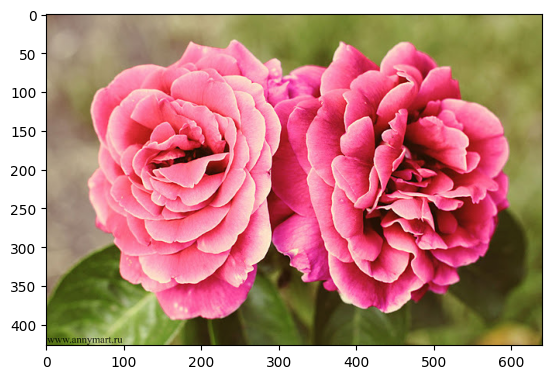

In [17]:
image = io.imread('flower.jpeg')
plt.imshow(image)
plt.show()

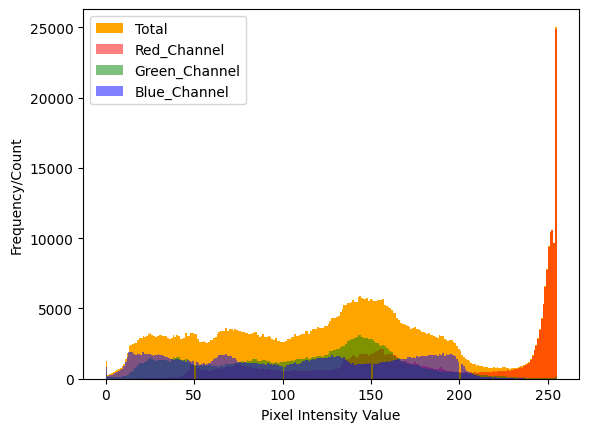

In [18]:
_ = plt.hist(image.ravel(), bins=256, color='orange')
_ = plt.hist(image[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins=256, color='Green', alpha=0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins=256, color='Blue', alpha=0.5)
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
_ = plt.xlabel('Pixel Intensity Value')
_ = plt.ylabel('Frequency/Count')
plt.show()

# Cumulitative Histogram

In [19]:
# make the image greyscale
from skimage.color import rgb2gray

gray_image = rgb2gray(image)

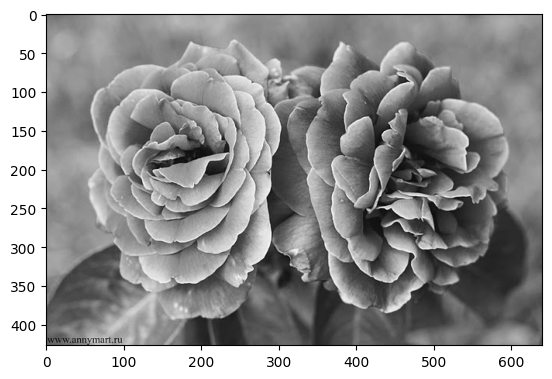

In [20]:
plt.imshow(gray_image, cmap='gray')

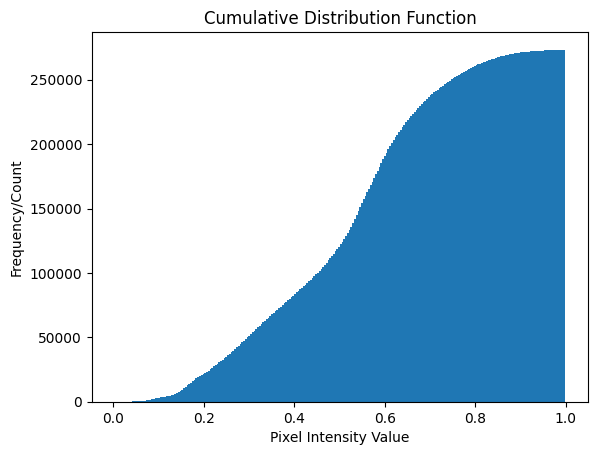

In [21]:
_ = plt.hist(gray_image.ravel(), bins=256, cumulative=True)
_ = plt.title('Cumulative Distribution Function')
_ = plt.xlabel('Pixel Intensity Value')
_ = plt.ylabel('Frequency/Count')
plt.show()

In [22]:
import cv2 as cv
import numpy as np

In [23]:
# load images
img_1 = cv.imread('LondonBigeye.jpg')
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

img_2 = cv.imread('Paddington.jpg')
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

img_3 = cv.imread('the-stadium.jpg')
img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)

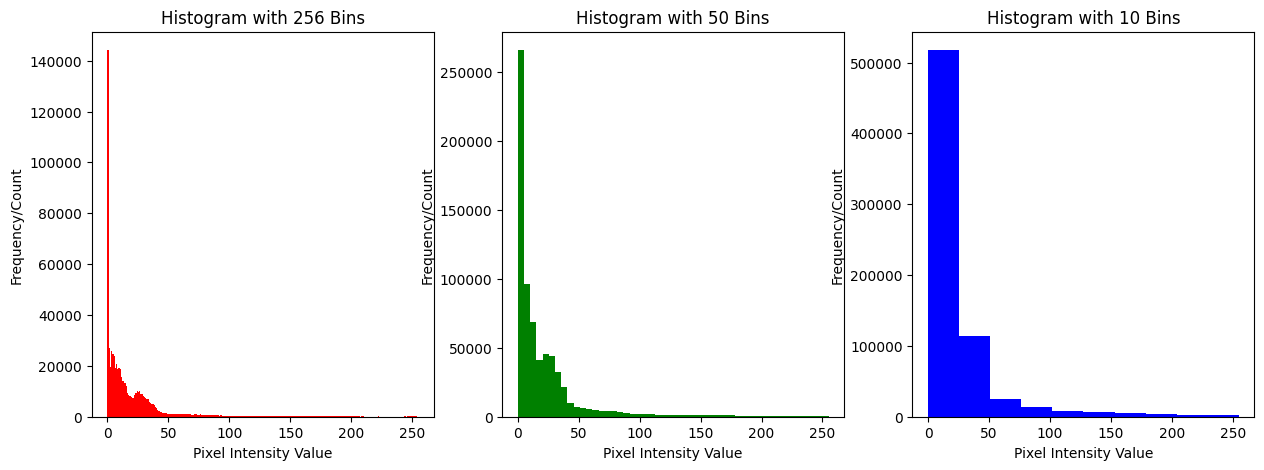

In [28]:
# using numnpy we will convert the image to grayscale
img_gray = np.uint8(np.mean(img_1, axis=-1))

# remove the spatial dimensions from the image
flat_gray_img = img_gray.flatten()

# plot the histogram on one canvas with different colors and bins
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(flat_gray_img, bins=256, color='r')
ax[0].set_title('Histogram with 256 Bins')
ax[0].set_xlabel('Pixel Intensity Value')
ax[0].set_ylabel('Frequency/Count')

ax[1].hist(flat_gray_img, bins=50, color='g')
ax[1].set_title('Histogram with 50 Bins')
ax[1].set_xlabel('Pixel Intensity Value')
ax[1].set_ylabel('Frequency/Count')

ax[2].hist(flat_gray_img, bins=10, color='b')
ax[2].set_title('Histogram with 10 Bins')
ax[2].set_xlabel('Pixel Intensity Value')
ax[2].set_ylabel('Frequency/Count')

plt.show()

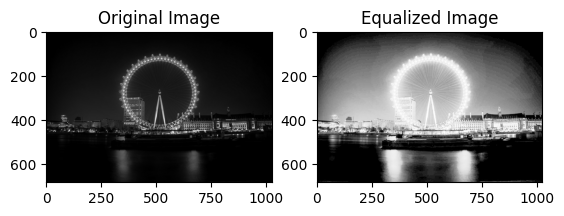

In [29]:
# histogram equalization using opencv
img_gray_eq = cv.equalizeHist(img_gray)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_gray_eq, cmap='gray')
plt.title('Equalized Image')
plt.show()

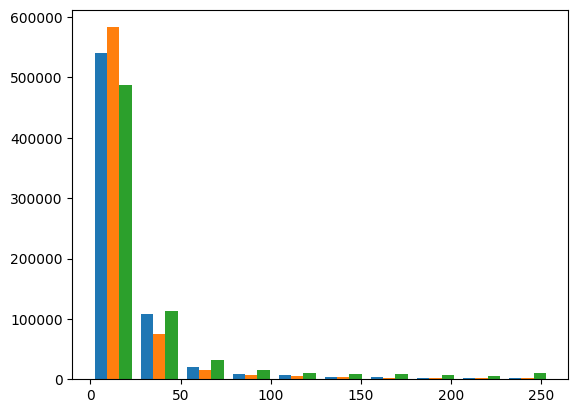

In [31]:
reshaped_img = np.reshape(img_1, (-1, 3))
plt.hist(reshaped_img, bins=10)
plt.show()

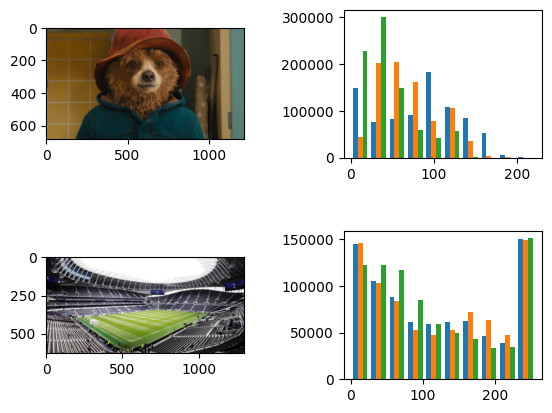

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(img_2)
plt.subplot(2, 2, 2)
plt.hist(np.reshape(img_2, (-1, 3)), bins=10)
plt.subplot(2, 2, 3)
plt.imshow(img_3)
plt.subplot(2, 2, 4)
plt.hist(np.reshape(img_3, (-1, 3)), bins=10)

#  add space between the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

1D Convolutions


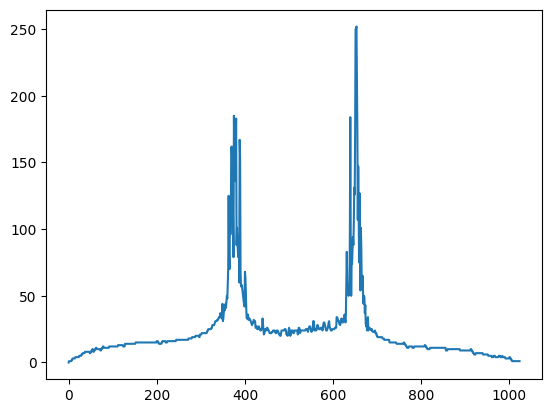

In [34]:
y = img_gray[200, :]

plt.plot(range(len(y)), y)
plt.show()

In [35]:
def convolve1D(data, kernel):
	output = []
	template = kernel[::-1]

	for i in range(0, len(data) - len(template) + 1):
		res_i = 0
		for j in range(len(template)):
			res_i += data[i + j] * template[j]
		output.append(res_i)

	return np.array(output)

In [ ]:
# Different version of the convolution function
def convolve1D(data, kernel):
	output = []
	template = kernel[::-1]
	
    for i in range(1, len(data) - 1):
	